<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [259]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import dates
from netCDF4 import num2date,date2num,Dataset
import matplotlib._pylab_helpers
#from joblib import Parallel, delayed
import scipy.interpolate as interpolate
from scipy.stats.mstats import scoreatpercentile
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import os,subprocess,time,copy
import scipy
import datetime
import matplotlib.gridspec as gridspec
#import pyart.graph.cm as pcm
#import cPickle as pickle
#import pickle
#import pprint
#import triangle
import corner
#import f90nml
%matplotlib inline

In [260]:
from marcus_py_tools import make_edge_vec, xy_from_latlon, latlon_from_xy, walklevel, find_stuff_at_level,haversine

In [261]:
import re

In [6]:
def walklevel(some_dir, level=1):
    some_dir = some_dir.rstrip(os.path.sep)
    assert os.path.isdir(some_dir)
    num_sep = some_dir.count(os.path.sep)
    for root, dirs, files in os.walk(some_dir):
      yield root, dirs, files
      num_sep_this = root.count(os.path.sep)
      if num_sep + level <= num_sep_this:
        del dirs[:]

In [7]:
matplotlib.rcParams.update({'font.size': 14})

In [8]:
#..Get a list of files to read from
case = 'dycoms'
#case = 'bomex'
#case = 'rico'
#case = 'sct'
case_upper = case.upper()

#main_dir = '/home/marcus/marcus_data/E3SM_BOSS_PPE_data/GISS_SCM_PPE/dycoms/'
main_dir = '/data/gelsaess/giss-e3scm-ppe-elsaesser/'+case+'/'
#main_dir = '/Users/marcus/Research/Elsaesser_NASA/SCM_PPE/'+case+'/'
subdir_list = []
num_subdir  = 0
for root,dirs,files in walklevel(main_dir,level=0):
    for dirr in dirs:
        #if dirr.startswith('SCM_'+case_upper+'_jingbo'):
        if dirr.startswith('SCM_'+case_upper+'_gse'):
            subdir_list.append(dirr)
            num_subdir += 1
subdir_list = sorted(subdir_list)
subdir_list = subdir_list[1:]
num_subdir -= 1
print(num_subdir,subdir_list[-1])

850 SCM_DYCOMS_gse850F110


In [9]:
#..Pick one. First see if we can read parameters
par_dict = {}
pars = []
parnames = list()
with open(main_dir+subdir_list[420]+'/I') as myfile:
    for myline in myfile:
        if (myline[0]==' '):
            pass
        else:
            r = re.findall(r'([a-zA-Z]*)=(\S+)',myline)
            for name,val in r:
                if val:
                    pars = np.r_[pars,float(val)]
                parnames = parnames + [name]
            idict={name:float(val) for name,val in r}
            par_dict.update(idict)

In [10]:
print(par_dict)
print(pars.shape)
print(len(parnames))

{'debdecaytime': 2150.66, 'mc': 42.159, 'xs': 110.259, 'qc': 0.000122477, 'multiplier': 0.639139, 'mstcnv': 10.6449, '': 3.31033, 'urelscale': 65.1935, 'dpscale': 64.3072, 'scale': 0.000714371, 'fevapfac': 0.0327813, 'fac': 1.00092, 'max': 113.406, 'detbyent': 0.357525, 'dd': 5.68312e-05, 'overshoot': 0.270718, 'aspcp': 0.139813, 'fddrt': 0.60429, 'tfmc': 255.196, 'env': 5.26882, 'homf': 237.609, 'rhcsl': 0.833764, 'rhctl': 0.932526, 'homfree': 239960.0, 'dcs': 0.000351213, 'rh': 0.970603, 'pow': 0.212904, 'time': 3553.15, 'cn': 0.838203, 'iifn': 8.71985, 'difn': 8.76673, 'ifluffy': 0.19737, 'sfluffy': 0.612629, 'multi': 0.854739, 'mults': 1.25661, 'entrain': 15.1426}
(45,)
45


In [11]:
print(parnames)

['debdecaytime', 'mc', 'xs', 'qc', 'multiplier', 'mstcnv', 'mstcnv', '', '', 'urelscale', 'dpscale', '', '', '', '', 'scale', 'fevapfac', 'fac', 'max', 'fac', 'max', 'detbyent', 'dd', 'overshoot', 'aspcp', 'fac', 'fddrt', 'tfmc', 'env', 'homf', 'rhcsl', 'rhctl', 'homfree', 'dcs', 'rh', 'pow', 'time', 'cn', 'iifn', 'difn', 'ifluffy', 'sfluffy', 'multi', 'mults', 'entrain']


In [12]:
#.. Now let's make a plot or two
idx = 500
#nc = Dataset(main_dir+subdir_list[idx]+'/allsteps.cijh1SCM_'+case_upper+'_jingbo'+str(idx+1).zfill(3)+'F110.nc','r')
nc = Dataset(main_dir+subdir_list[idx]+'/allsteps.cijh1SCM_'+case_upper+'_gse'+str(idx+1).zfill(3)+'F110.nc','r')
time = nc.variables['time'][:]
prec = nc.variables['prec'][:,0,0]
lwp  = nc.variables['lwp'][:,0,0]
nc.close()


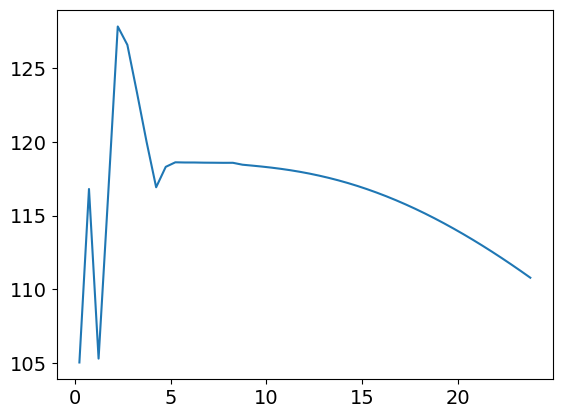

In [13]:
plt.plot(time,lwp)

In [15]:
print(time.shape,time)

(48,) [ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75
 18.25 18.75 19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75]


In [182]:
#..Roll through all PPE files, scrape out what's requested
def scrape_singletime_PPE(main_dir,case_upper,subdir_list,varn='prec',ftype='c',tidx=12):
    varz = []
    for i in range(num_subdir):
        flnm=main_dir+subdir_list[i]+'/allsteps.'+ftype+'ijh1SCM_'+case_upper+'_gse'+str(i+1).zfill(3)+'F110.nc'
        nc = Dataset(flnm,'r')
        var = nc.variables[varn][tidx,0,0]
        nc.close()
        varz = np.r_[varz,var]
    return varz



In [179]:
#..Get inversion height (from theta gradient below 6km) -- maybe not needed since there's a PBL variable
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def get_inv_height(main_dir,case_upper,subdir_list,maxheight=6000,tidx=12):
    varz = []
    for i in range(num_subdir):
        #..look for max of delta(theta) below maxheight, output the av of the height of the two cells
        nc = Dataset(main_dir+subdir_list[i]+'/allsteps.aijlh1SCM_'+case_uppper+'_gse'+str(i+1).zfill(3)+'F110.nc',
                     'r')
        var = nc.variables['th'][tidx,:,0,0]
        zax   = nc.variables['z'][tidx,:,0,0]
        nc.close()
        idx_zmax = np.abs(zax-6000.).argmin()
        dvar = var[1:idx_zmax] - var[:idx_zmax-1]
        varz = np.r_[varz,zax[dvar.argmax()]]
    return varz


In [242]:
#..List of 1D variables and the file type for each
#..        precip  pbl height  stratiform opt   conv opt
# od_vars = ['prec', 'pblht',   'tau_ss',       'tau_mc', 'olr' ]
# ft_vars = ['c',     'a',      'c',             'c',      'r']

od_vars = ['prec', 'pblht',   'tau_ss',     'olr' ]
ft_vars = ['c',     'a',      'c',            'r']

#..Maybe some 2D variables we'd like to look at later?
#..        strat_cloud  strat_prec
td_vars = ['qpl',       'qcl']

In [241]:
#..Surface precip sucks because it's almost always zero. Let's get precip (well, qpl) at cloud base
#..Define as: qcl > 1e-4, delta(qcl) > 0.
def get_prec_cloudbase(main_dir,case_upper,subdir_list,maxheight=6000.,tidx=12,qcl_thr=5.e-5,dqcl_thr=1.e-5,logy=True):
    varz = []
    zz   = []
    for i in range(num_subdir):
        #..look for max of delta(theta) below maxheight, output the av of the height of the two cells
        nc = Dataset(main_dir+subdir_list[i]+'/allsteps.cijlh1SCM_'+case_upper+'_gse'+str(i+1).zfill(3)+'F110.nc',
                     'r')
        qcl   = nc.variables['qcl'][tidx,:,0,0]
        qpl   = nc.variables['qpl'][tidx,:,0,0]
        nc.close()
        nc = Dataset(main_dir+subdir_list[i]+'/allsteps.aijlh1SCM_'+case_upper+'_gse'+str(i+1).zfill(3)+'F110.nc',
                     'r')
        zax   = nc.variables['z'][tidx,:,0,0]
        nc.close()
        idx_zmax = np.abs(zax-maxheight).argmin()
        condition = True
        j = 0
        if logy:
            while condition:
                if (qcl[j]>qcl_thr) and (qcl[j+1]-qcl[j]>dqcl_thr):
                    if (qpl[j]>0.):
                        varz = np.r_[varz,np.log10(qpl[j])]
                    else:
                        varz = np.r_[varz,-15.]
                    zz   = np.r_[zz,zax[j]]
                    condition = False
                if j==idx_zmax:
                    varz = np.r_[varz,-15.]
                    zz   = np.r_[zz,0.]
                    condition = False
                j += 1     
        else:
            while condition:
                if (qcl[j]>qcl_thr) and (qcl[j+1]-qcl[j]>dqcl_thr):
                    varz = np.r_[varz,qpl[j]]
                    zz   = np.r_[zz,zax[j]]
                    condition = False
                if j==idx_zmax:
                    varz = np.r_[varz,0.]
                    zz   = np.r_[zz,0.]
                    condition = False
                j += 1  
    return varz,zz


In [243]:
prec_clb,zz = get_prec_cloudbase(main_dir,case_upper,subdir_list,qcl_thr=5.e-5)

(array([ 22.,   0.,   8.,  47.,   0.,  18., 204.,   0., 528.,  23.]),
 array([  0.        ,  57.99935303, 115.99870605, 173.99805908,
        231.99741211, 289.99676514, 347.99611816, 405.99547119,
        463.99482422, 521.99417725, 579.99353027]),
 <BarContainer object of 10 artists>)

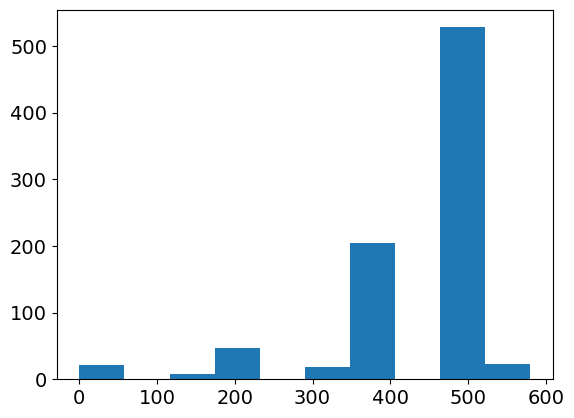

In [244]:
plt.hist(zz)

(array([198.,   0.,   1.,   0.,   1.,   1.,   1.,   1.,   2.,   0.,   1.,
          5.,  25., 121., 165., 189.,  15.,  11.,  52.,  61.]),
 array([-15.        , -14.47106354, -13.94212708, -13.41319063,
        -12.88425417, -12.35531771, -11.82638125, -11.2974448 ,
        -10.76850834, -10.23957188,  -9.71063542,  -9.18169897,
         -8.65276251,  -8.12382605,  -7.59488959,  -7.06595314,
         -6.53701668,  -6.00808022,  -5.47914376,  -4.9502073 ,
         -4.42127085]),
 <BarContainer object of 20 artists>)

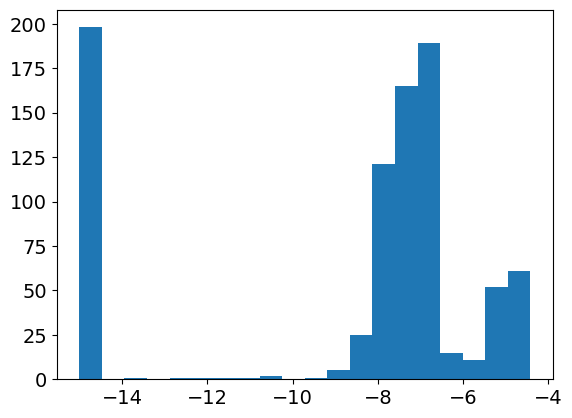

In [245]:
#..Look at some of output
#plt.hist(out_file[:,0])
plt.hist(prec_clb,bins=20)

In [246]:
#..loop through files and dump requested outputs to some outputs file
numout   = len(od_vars)
out_file = np.zeros((num_subdir,numout))
print(out_file.shape)
for i in range(numout):
    out_file[:,i] = scrape_singletime_PPE(main_dir,case_upper,subdir_list,varn=od_vars[i],ftype=ft_vars[i])
    
#..Replace precip with precip at cloud base
out_file[:,0] = prec_clb

(850, 4)


In [239]:
#..Save the file
#np.savetxt('giss_scm_ppe_dycomsonly_00.txt',out_file)  #..first try
np.savetxt('giss_scm_ppe_dycomsonly_01.txt',out_file)  #..replace prec with prec@cloudbase

## Now get BOMEX... only LWP for now (hours 3-4)

In [247]:
#..Get a list of files to read from
#case = 'dycoms'
case = 'bomex'
#case = 'rico'
#case = 'sct'
case_upper = case.upper()

#main_dir = '/home/marcus/marcus_data/E3SM_BOSS_PPE_data/GISS_SCM_PPE/dycoms/'
main_dir = '/data/gelsaess/giss-e3scm-ppe-elsaesser/'+case+'/'
#main_dir = '/Users/marcus/Research/Elsaesser_NASA/SCM_PPE/'+case+'/'
subdir_list = []
num_subdir  = 0
for root,dirs,files in walklevel(main_dir,level=0):
    for dirr in dirs:
        #if dirr.startswith('SCM_'+case_upper+'_jingbo'):
        if dirr.startswith('SCM_'+case_upper+'_gse'):
            subdir_list.append(dirr)
            num_subdir += 1
subdir_list = sorted(subdir_list)
subdir_list = subdir_list[1:]
num_subdir -= 1
print(num_subdir,subdir_list[-1])

850 SCM_BOMEX_gse850F110


In [248]:
od_vars = ['lwp',]
ft_vars = ['c',]

In [251]:
#..loop through files and dump requested outputs to some outputs file
numout   = len(od_vars)
print(numout)
out_bomex = np.zeros((num_subdir,numout))
print(out_bomex.shape)
for i in range(numout):
    out_bomex[:,i] = scrape_singletime_PPE(main_dir,case_upper,subdir_list,varn=od_vars[i],ftype=ft_vars[i],tidx=6)

1
(850, 1)


## Now get RICO... LWP, cloud fraction, RWP (hours 20-24)

In [252]:
#..Get a list of files to read from
#case = 'dycoms'
#case = 'bomex'
case = 'rico'
#case = 'sct'
case_upper = case.upper()

#main_dir = '/home/marcus/marcus_data/E3SM_BOSS_PPE_data/GISS_SCM_PPE/dycoms/'
main_dir = '/data/gelsaess/giss-e3scm-ppe-elsaesser/'+case+'/'
#main_dir = '/Users/marcus/Research/Elsaesser_NASA/SCM_PPE/'+case+'/'
subdir_list = []
num_subdir  = 0
for root,dirs,files in walklevel(main_dir,level=0):
    for dirr in dirs:
        #if dirr.startswith('SCM_'+case_upper+'_jingbo'):
        if dirr.startswith('SCM_'+case_upper+'_gse'):
            subdir_list.append(dirr)
            num_subdir += 1
subdir_list = sorted(subdir_list)
subdir_list = subdir_list[1:]
num_subdir -= 1
print(num_subdir,subdir_list[-1])

850 SCM_RICO_gse850F110


In [253]:
od_vars = ['lwp', 'cldtot_2d', 'prec']
ft_vars = ['c',   'c',         'c']

In [254]:
#..loop through files and dump requested outputs to some outputs file
numout   = len(od_vars)
out_rico = np.zeros((num_subdir,numout))
print(out_rico.shape)
for i in range(numout):
    out_rico[:,i] = scrape_singletime_PPE(main_dir,case_upper,subdir_list,varn=od_vars[i],ftype=ft_vars[i],tidx=40)
    
#..Just for rico it would be nice to append RWP, but no dice. 

(850, 3)


## Now get TWP-ICE... peak IWP. Or just skip it for now...

In [ ]:
#..Get a list of files to read from
#case = 'dycoms'
#case = 'bomex'
#case = 'rico'
#case = 'sct'
case = 'twpice15mins'
case_upper = case.upper()

#main_dir = '/home/marcus/marcus_data/E3SM_BOSS_PPE_data/GISS_SCM_PPE/dycoms/'
main_dir = '/data/gelsaess/giss-e3scm-ppe-elsaesser/'+case+'/'
#main_dir = '/Users/marcus/Research/Elsaesser_NASA/SCM_PPE/'+case+'/'
subdir_list = []
num_subdir  = 0
for root,dirs,files in walklevel(main_dir,level=0):
    for dirr in dirs:
        #if dirr.startswith('SCM_'+case_upper+'_jingbo'):
        if dirr.startswith('SCM_'+case_upper+'_gse'):
            subdir_list.append(dirr)
            num_subdir += 1
subdir_list = sorted(subdir_list)
subdir_list = subdir_list[1:]
num_subdir -= 1
print(num_subdir,subdir_list[-1])

## Aggregate all the output files into one, save that

In [255]:
out_all  = np.hstack((out_file,out_bomex,out_rico))

In [257]:
print(out_all.shape)
np.savetxt('giss_scm_ppe_dycomsbomexrico_01.txt',out_all)

(850, 8)


## Below here is just some plots/tests of output fields

/tmp/ipykernel_23970/3331346384.py:20: RuntimeWarning: divide by zero encountered in log10
  pco = ax2.pcolormesh(T1.T,P1.T,np.log10(qpl))


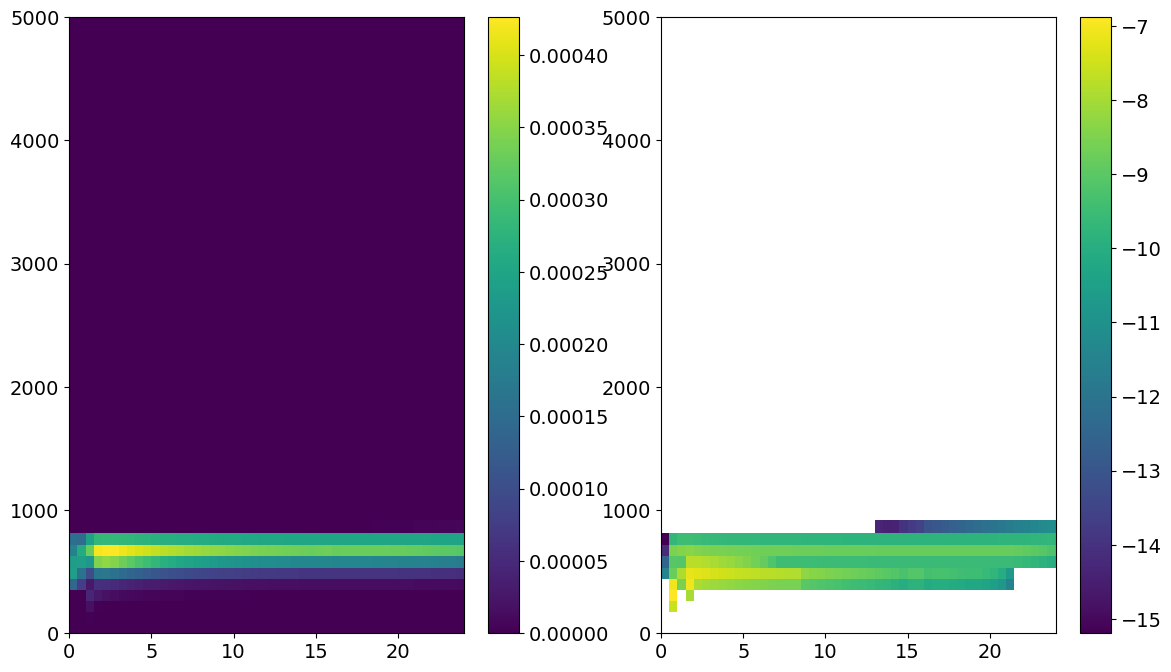

In [240]:
#..Look at some of the fields

#..Hard to find a case where precip reaches surface
idx = 27
nc = Dataset(main_dir+subdir_list[idx]+'/allsteps.cijlh1SCM_'+case_upper+'_gse'+str(idx+1).zfill(3)+'F110.nc','r')
time1 = nc.variables['time'][:]
p1    = nc.variables['p'][:]
qcl   = nc.variables['qcl'][:,:,0,0]
qpl   = nc.variables['qpl'][:,:,0,0]
nc.close()
T1,P1 = np.meshgrid(time1,zax[0,:])

fig=plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(121)
pco = ax1.pcolormesh(T1.T,P1.T,qcl)
ax1.set_ylim(0,5000)
plt.colorbar(pco)

ax2 = fig.add_subplot(122)
pco = ax2.pcolormesh(T1.T,P1.T,np.log10(qpl))
ax2.set_ylim(0,5000)
plt.colorbar(pco)

(48, 110) (48, 110)
(110, 48)


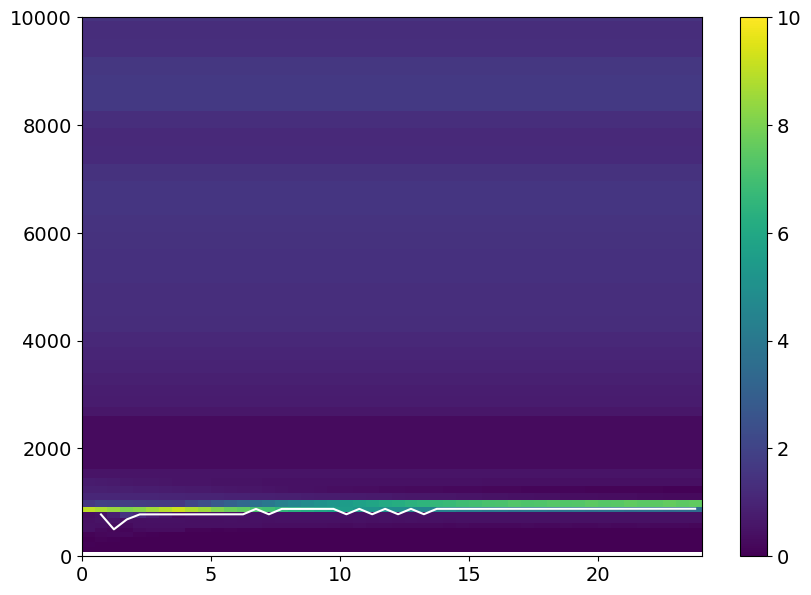

In [140]:
#..Let's try to get boundary layer depth
nc = Dataset(main_dir+subdir_list[200]+'/allsteps.aijlh1SCM_'+case_upper+'_gse'+str(200+1).zfill(3)+'F110.nc','r')
theta = nc.variables['th'][:,:,0,0]
time  = nc.variables['t'][:,:,0,0]
zax   = nc.variables['z'][:,:,0,0]
p_3d  = nc.variables['p_3d'][:,:,0,0]
time1 = nc.variables['time'][:]
p1    = nc.variables['p'][:]
nc.close()
print(time.shape,zax.shape)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
#T1,P1 = np.meshgrid(time1,p1)
T1,P1 = np.meshgrid(time1,zax[0,:])
print(T1.shape)
#ax.pcolormesh(T1.T,P1.T,theta[:,:])
pco = ax.pcolormesh(T1[1:,:].T,P1[1:,:].T,theta[:,1:]-theta[:,:-1],vmin=0,vmax=10)
#ax.set_yscale('log')
ax.set_ylim(0,10000)
plt.colorbar(pco)

#..Plot the PBL height variable on here
nc = Dataset(main_dir+subdir_list[200]+'/allsteps.aijh1SCM_'+case_upper+'_gse'+str(200+1).zfill(3)+'F110.nc','r')
pblh = nc.variables['pblht'][:,0,0]
nc.close()
ax.plot(time1[1:],pblh[1:],'w-')

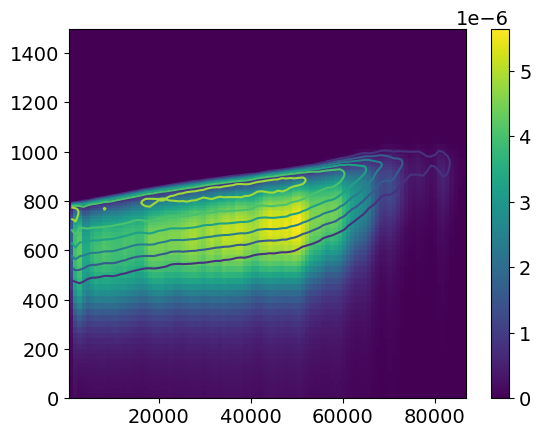

In [268]:
#..Look at output from DHARMA for DYCOMS precip at cloud base (because we need a q, not a rate)
filenm = '/data/gelsaess/LES/LES_DYCOMS-II-RF02_intSfc_profiles.nc'
nc = Dataset(filenm,'r')
qr = nc.variables['qr'][:,:]
ql = nc.variables['ql'][:,:]
time = nc.variables['time'][:]
zf   = nc.variables['zf'][:]
nc.close()

clp = plt.pcolormesh(time,zf,qr.T)
plt.colorbar(clp)
plt.contour(time,zf,ql.T)

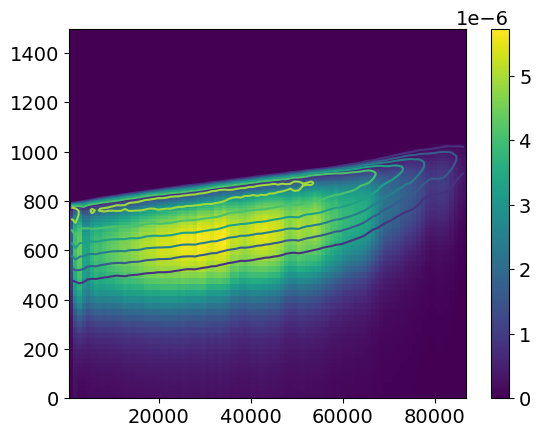

In [269]:
#..Look at output from DHARMA for DYCOMS precip at cloud base (because we need a q, not a rate)
filenm = '/data/gelsaess/LES/LES_DYCOMS-II-RF02_profiles.nc'
nc = Dataset(filenm,'r')
qr = nc.variables['qr'][:,:]
ql = nc.variables['ql'][:,:]
time = nc.variables['time'][:]
zf   = nc.variables['zf'][:]
nc.close()

clp = plt.pcolormesh(time,zf,qr.T)
plt.colorbar(clp)
plt.contour(time,zf,ql.T)

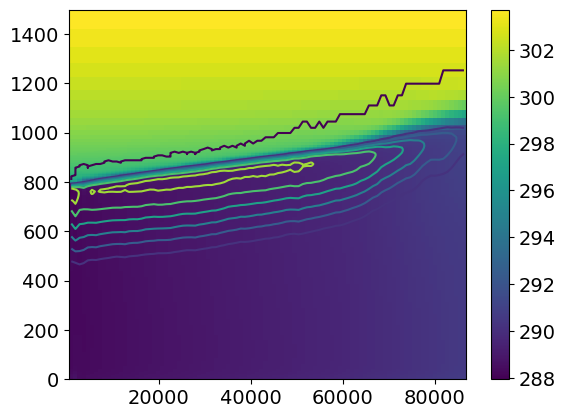

In [270]:
#..Look at output from DHARMA for DYCOMS precip at cloud base (because we need a q, not a rate)
filenm = '/data/gelsaess/LES/LES_DYCOMS-II-RF02_profiles.nc'
nc = Dataset(filenm,'r')
thetal = nc.variables['thetal'][:,:]
ql = nc.variables['ql'][:,:]
time = nc.variables['time'][:]
zf   = nc.variables['zf'][:]
nc.close()

clp = plt.pcolormesh(time,zf,thetal.T)
plt.colorbar(clp)
plt.contour(time,zf,ql.T)